다음 이론들은 모두 주식 시장의 수익률이 정규 분포를 이룬다는 사실에 기반을 둠

#### 1. 포트폴리오 이론
 - 주식 수익률 : 정규 분포 -> 최적 포트폴리오의 선택 : 개별 주식의 평균 수익률, 분산, 각 주식 사이의 공분산만 고려

#### 2. 자본 자산 가격결정 모형(CAPM)
 - 개별 주식의 가격과 전체 시장 지수의 관계 : $\beta$(개별 주식과 시장 지수의 공통 움직임을 설명하는 측도)로 간단히 표현 가능

#### 3. 효율적 시장 가설
 - 효율적 시장 : 얻을 수 있는 '모든' 정보가 가격에 반영되어 있는 시장

#### 4. 옵션 가격결정 모형
 - 블랙-숄즈 옵션 가격결정 공식 : 주식의 움직임에 대해 정규분포 수익률을 발생시키는 기하브라운 운동 모형 사용

# 11.1.1 벤치마크 자료 분석
 - 기하 브라운 운동 경로 S의 특성
    - 로그 정규분포 수익률
       - 시간 s와 t 사이의 로그 수익률 $\log({S_t \over S_s}) = \log S_t - \log S_s$은 정규분포를 이룬다.
      
    - 로그 정규분포 값
       - 임의의 시간 t > 0에서 $S_t$의 값은 로그 정규분포를 이룬다.

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_paths(S0, r, sig, T, M, i):
    ''' 기하 브라운 운동에 대한 몬테카를로 경로 생성
    
    인수
    ====
    S0 : float
         초기 주가/지수 값
    
    r : float
        고정 단기 이자율
        
    sig : float
          고정 변동성
          
    T : float
        만기
        
    M : int
        시간 구간의 수
        
    i : int
        생성한 경로의 수
    
    반환 값
    ====
    paths : ndarray, shape (M + 1, i)
        주어진 인수
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, i), np.float64)
    paths[0] = S0
    
    for t in range(1, M + 1):
        rand = np.random.standard_normal(i)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sig ** 2) * dt + sig * np.sqrt(dt) * rand)
    
    return paths

In [3]:
S0 = 100.
r = 0.05
sig = 0.2
T = 1.0
M = 50
i = 250000
paths = gen_paths(S0, r, sig, T, M, i)

Text(0, 0.5, 'index level')

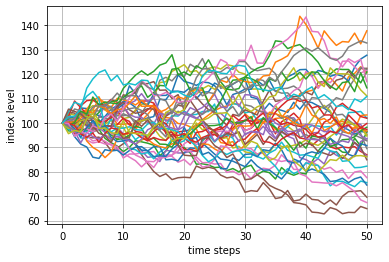

In [4]:
plt.plot(paths[:, :40])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [5]:
log_returns = np.log(paths[1:] / paths[:-1])

In [6]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [7]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [8]:
def print_statistics(array):
    ''' 통계치 출력
    
    인수
    ====
    array : ndarray
        통계치를 계산할 자료
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * '-')
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [9]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


대부분의 자료가 +/- 0.15 사이에 있음을 알 수 있다. 

& 평균 수익률과 변동성을 연율화 하면(50구간 -> 각각 50, $\sqrt{50}$ 곱함) 0.05, 0.2가 될 것이다

#### 시각적 비교

C:\Users\anrnd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


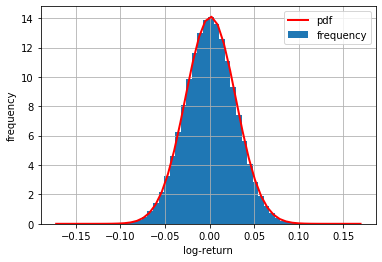

In [10]:
plt.hist(log_returns.flatten(), bins = 50, normed = True, label = 'frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc = r / M, scale = sig / np.sqrt(M)), 'r', lw = 2.0, label = 'pdf')
plt.legend()

시뮬레이션된 로그 수익률 분포와 주어진 r, sigma 값에 대한 정규분포의 확률 밀도 함수 비교 -> 일치!

Other method - 분위수 대조도(Q-Q 플롯)
 - 샘플값의 샘플 분위수와 정규분포 상의 이론적 분위수를 비교

Text(0, 0.5, 'sample quantiles')

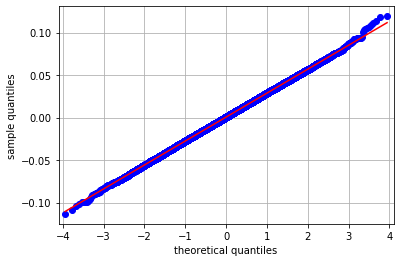

In [11]:
sm.qqplot(log_returns.flatten()[::500], line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

대다수의 분위수 값의 쌍이 일직선을 이룬다.

#### 통계적 검정 -> normality_test 함수
 - 왜도 검정
   - 샘플 자료의 왜도가 정규분포와 일치하는지(0에 가까운 값을 가지는지) 판단
   
 - 첨도 검정
   - 샘플 자료의 첨도가 정규분포와 일치하는지(0에 가까운 값을 가지는지) 판단
   
 - 정규정 검정
   - 다른 두 검정을 조합

In [12]:
def normality_tests(arr):
    ''' 주어진 데이터가 정규분포인지 검정
    
    인수
    ====
    array : ndarray
    '''
    print("Skew of data set %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value % 14.3f" % scs.normaltest(arr)[1])

In [13]:
normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


검정 결과 유의 확률(p-value)이 0.05 이상이므로 로그수익률이 정규분포임을 나타낸다.

Text(0.5, 1.0, 'log data')

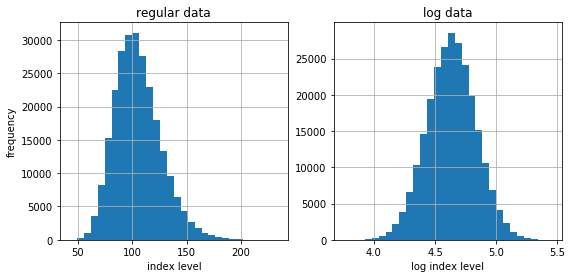

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 4))
ax1.hist(paths[-1], bins = 30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins = 30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [15]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


평균 105, 표준편차 20%에 가깝다.

In [16]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


로그 변환 후 왜도와 첨도 : 0 에 가깝다.

In [17]:
normality_tests(np.log(paths[-1]))

Skew of data set         -0.001
Skew test p-value          0.851
Kurt of data set         -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


높은 유의 확률 -> 정규분포 가설에 부합

In [18]:
log_data = np.log(paths[-1])

C:\Users\anrnd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


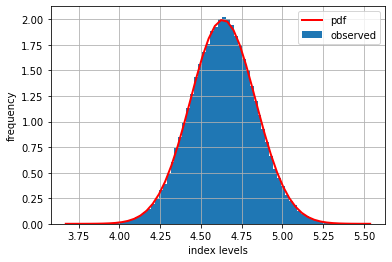

In [19]:
plt.hist(log_data, bins = 70, normed = True, label = 'observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw = 2.0, label = 'pdf')
plt.legend()

데이터의 히스토그램과 정규분포의 확률 밀도 함수 비교 -> 일치!

Text(0, 0.5, 'sample quantiles')

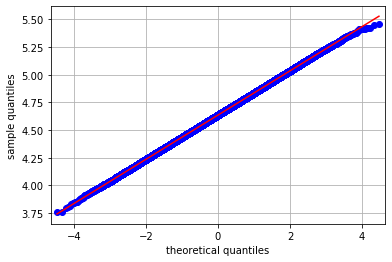

In [20]:
sm.qqplot(log_data, line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

# 11.1.2 현실 자료 분석
 - ETF(미국 S&P 500 지수 추종 SPY, 금 가격 추종 GLD), 개별 종목(삼성전자, 마이크로소프트) 분석

In [21]:
import pandas as pd
from pandas_datareader import data as web

In [22]:
symbols = ['SPY', 'GLD', '005930.KS', 'MSFT'] # YAHOO FINANCE에서 종목 선택

In [23]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'yahoo', start = '1/1/2014', end = '9/26/2019')['Close']

data = data.dropna()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1361 entries, 2014-01-02 to 2019-09-26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPY        1361 non-null   float64
 1   GLD        1361 non-null   float64
 2   005930.KS  1361 non-null   float64
 3   MSFT       1361 non-null   float64
dtypes: float64(4)
memory usage: 53.2 KB


In [25]:
data.head()

,SPY,GLD,005930.KS,MSFT
Date,,,,
2014-01-02,182.919998,118.000000,26180.0,37.160000
2014-01-03,182.889999,119.290001,25920.0,36.910000
2014-01-06,182.360001,119.500000,26140.0,36.130001
2014-01-07,183.479996,118.820000,26080.0,36.410000
2014-01-08,183.520004,118.120003,25820.0,35.759998


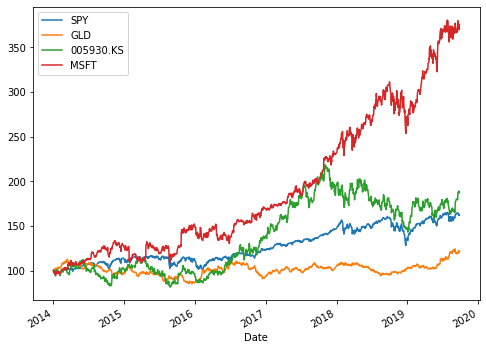

In [26]:
(data / data.loc[data.index[0]] * 100).plot(figsize = (8, 6))

초기 값을 100으로 정규화

In [27]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,005930.KS,MSFT
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.000164,0.010873,-0.009981,-0.006750
2014-01-06,-0.002902,0.001759,0.008452,-0.021359
2014-01-07,0.006123,-0.005707,-0.002298,0.007720
2014-01-08,0.000218,-0.005909,-0.010019,-0.018014


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C85DD88948>,
      dtype=object)

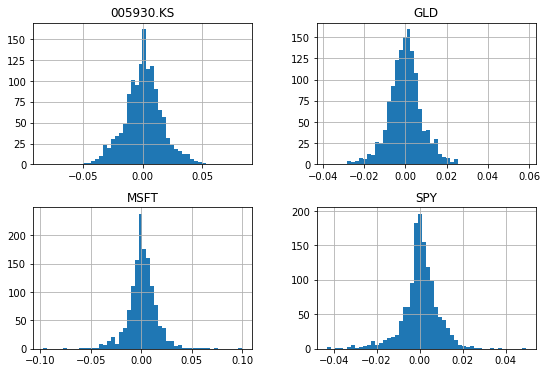

In [28]:
log_returns.hist(bins = 50, figsize = (9, 6))

In [29]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1360.00000
           min        -0.04302
           max         0.04929
          mean         0.00036
           std         0.00863
          skew        -0.55102
      kurtosis         3.62951

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      1360.00000
           min        -0.03788
           max         0.05828
          mean         0.00014
           std         0.00855
          skew         0.32038
      kurtosis         3.39461

Results for symbol 005930.KS
------------------------------
     statistic           value
------------------------------
          size      1360.00000
           min        -0.08377
           max         0.08331
          mean         0.00046
           std         0.01645
          skew        -0.04342
      kurtosis         

첨도(kurtosistest) 값은 정규분포와 거리가 멀다.

Text(0, 0.5, 'sample quantiles')

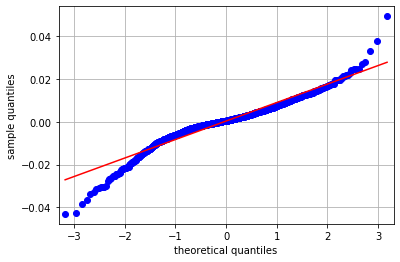

In [30]:
sm.qqplot(log_returns['SPY'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

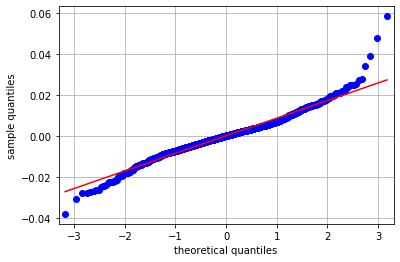

In [31]:
sm.qqplot(log_returns['GLD'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

샘플들의 분위수가 직선 X -> 정규 분포 X -> 팻 테일(fat tail) 현상 보인다.

  - fat tail 현상 : 분포 양쪽의 이상치들이 정규분포보다 더 양수이거나 음수인 경우

In [32]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set         -0.551
Skew test p-value          0.000
Kurt of data set          3.630
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set          0.320
Skew test p-value          0.000
Kurt of data set          3.395
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol 005930.KS
--------------------------------
Skew of data set         -0.043
Skew test p-value          0.511
Kurt of data set          1.564
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set          0.082
Skew test p-value          0.216
Kurt of data set          6.138
Kurt test p-value          0.000
Norm test p-value          0.000


모든 경우에 대해 유의 확률이 0 -> 정규 분포 가정을 기각

## 주식 시장 수익률이 기하 브라운 운동 모형과 같이 정규 분포를 따른다는 가정은 일바적으로 정당화 X -> Fat Tail을 설명하는 (점프 확산 모형, 확률적 변동성 모형과 같은) 확장된 모형 사용해야한다.